<a href="https://colab.research.google.com/github/theuttammishra/Capstone-Unsupervised/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** Uttam Mishra
##### **Team Member 2 -** Kshitij Singh

# **Project Summary -**

We started with first importing the library and loading the three datasets that were essential for this project.
After loading the data we took a first view of the datasets and then decided to go through them one by one.

Starting with Books dataset we checked its info and first five rows and found that there seems to be some unnecessary columns present in the data.
After dropping the URL column we checked for missing values and handled them appropriately.
Next step was to check the columns and variables description.
Now we performed data wrangling on the data to make it analysis ready.
in the data wrangling we corrected a few rows where values occured erroneously.
Changed the data type of Year of publication to integer.

Next we moved towards the Users dataset here again we performed the similar steps which we did on the books dataset.
1In the data wrangling part of Users dataset we corrected some age values and also we extracted countries names and replaced the values in the location column with only country name for the ease of work.

Moving on to the Ratings dataset we again did same things as compared to the other two datasets.
In the data wrangling part we segregated the data in non-zero and zero ratings and decided to work only with the non-zero ratings data.
After that we merged all the three dataset using ISBN column as it was present in all three of the datasets to move to next steps.

And then it was time for data visualization in which we tried to find out some crucial insights with the help of plots not limited to count,pie, scatter, box etc.
After the visualization part we move towards model implementation.

Here we started with Content Based Filtering model for which we created a function which will take the book title as input and then recommed 5 books similar to the input and if it can not find similar books it would say that no recommendations found for the book.
in this model we used countvectorizer and cosine similarity model.
Next model we used was K-nearest neighbour here it will use collaborative method to recommend books that are similar to the input.
After checking that both the model are working well we reached to the end of the project.


# **GitHub Link -**

https://github.com/theuttammishra/Capstone-Unsupervised

# **Problem Statement**


### Business Context
During the last few decades, with the rise of Youtube, Amazon, Netflix, and
many other such web services, recommender systems have taken more and
more place in our lives. From e-commerce (suggest to buyers articles that
could interest them) to online advertisement (suggest to users the right
contents, matching their preferences), recommender systems are today
unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at
suggesting relevant.
items to users (items being movies to watch, text to read, products to buy, or
anything else depending on industries). Recommender systems are really
critical in some industries as they can generate a huge amount of income
when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system
for users.
###Dataset Description
The Book-Crossing dataset comprises 3 files.
###Users:
Contains the users. Note that user IDs (User-ID) have been anonymized and
map to integers. Demographic data is provided (Location, Age) if available.
Otherwise, these fields contain NULL values.
###Books:
Books are identified by their respective ISBN. Invalid ISBNs have already been
removed from the dataset. Moreover, some content-based information is
given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from
Amazon Web Services. Note that in the case of several authors, only the first
is provided. URLs linking to cover images are also given, appearing in three
different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small,
medium, large. These URLs point to the Amazon website.

###Ratings:
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation),
or implicit, expressed by 0.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
import re
import pickle
import operator
import missingno as msno
import scipy
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from scipy.sparse.linalg import svds
from collections import Counter
from scipy.sparse import csr_matrix 
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import mstats
from scipy.stats import trim_mean   

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the files
books_df = pd.read_csv("/content/drive/MyDrive/Capstone 3/Books.csv")   
users_df = pd.read_csv("/content/drive/MyDrive/Capstone 3/Users.csv")     
ratings_df = pd.read_csv("/content/drive/MyDrive/Capstone 3/Ratings.csv") 

### Dataset First View

In [ ]:
# First view of Books Data
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# First view of Users Data
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# First view of Ratings Data
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Dataset Information books

In [ ]:
# Shape of Books Data
Rows,Columns = books_df.shape
print("Number of Rows = ", Rows)
print("Number of Columns = ", Columns)

Number of Rows =  271360
Number of Columns =  8


In [ ]:
# Dataset Info
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
books_df.duplicated().sum()

0

In [ ]:
# Dropping the url columns as we don't need them
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books_df.head() 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

<Axes: >

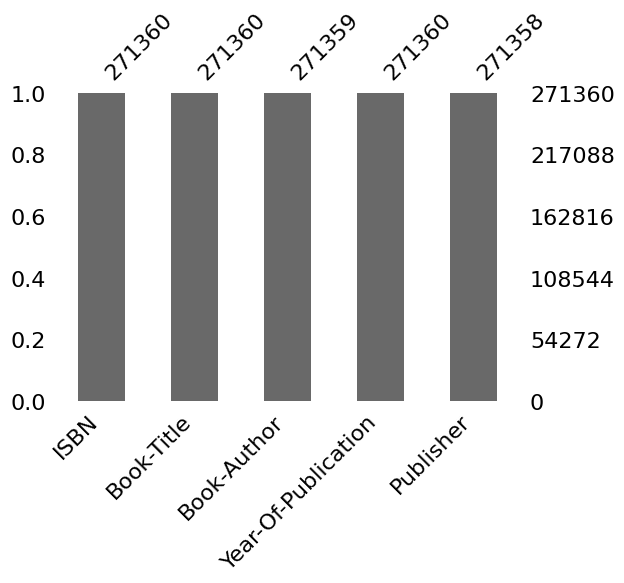

In [ ]:
# Visualizing the missing values
msno.bar(books_df, figsize = (6,4))

In [ ]:
# Filling null values with unknown
books_df.loc[books_df['Book-Author'].isnull(), 'Book-Author'] = 'Unknown'
books_df.loc[books_df['Publisher'].isnull(), 'Publisher'] = 'Unknown'

In [ ]:
# Rechecking the missing values
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

### ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [ ]:
# Dataset Describe
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271360,271360,271360
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


### Variables Description 

**ISBN**- The International Standard Book Number is a numeric commercial book identifier that is intended to be unique. Publishers purchase or receive ISBNs from an affiliate of the International ISBN Agency. An ISBN is assigned to each separate edition and variation of a publication

**Book-Title -** Title of the book

**Book-Author -**	Name of the author of the book

**Year-Of-Publication	-** Year when the book was published

**Publisher -** Name of the Publishing Company

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
books_df.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
dtype: int64

### 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking unique values for column Year-of-publication
books_df['Year-Of-Publication'].unique() 

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

in the output we can see that there are a few wrong values present in it so we will correct them.

In [ ]:
# Getting the particular row with error
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc',:] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [ ]:
# Checking the row of Gallimard
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


From the results it is clear that insted of comma data had colons. so we will correct them accordingly.


In [ ]:
# Correcting the values
books_df.loc[209538, ['Publisher', 'Year-Of-Publication', 
                      'Book-Title', 'Book-Author']] = ['DK Publishing Inc', 
                      2000, 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)', 'Michael Teitelbaum']

books_df.loc[221678, ['Publisher', 'Year-Of-Publication', 
                      'Book-Title', 'Book-Author']] = ['DK Publishing Inc',
                      2000, 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)', 'James Buckley']

books_df.loc[220731, ['Publisher', 'Year-Of-Publication', 
                      'Book-Title', 'Book-Author']] = ['Gallimard',
                      2003, 'Peuple du ciel - Suivi de Les bergers ', 'Jean-Marie Gustave Le ClÃ?Â©zio']


In [ ]:
# Rechecking the values
books_df['Year-Of-Publication'].unique() 

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
# Changing the datatype of year column
books_df= books_df.astype({'Year-Of-Publication':'int'})
print(books_df.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
dtype: object


In [ ]:
# Sorting the Year in ascending order 
sorted_years = sorted(books_df['Year-Of-Publication'].unique())
print(sorted_years)

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


0 seems to be incorrect so replacing it and also remoplacing values after 2004

In [ ]:
# Finding 0 and making it a NaN 
mask = (books_df['Year-Of-Publication'] > 2004) | (books_df['Year-Of-Publication'] == 0)
books_df.loc[mask, 'Year-Of-Publication'] = np.nan

# Filling the NaN with median
median_year = books_df['Year-Of-Publication'].median()
books_df['Year-Of-Publication'].fillna(median_year, inplace=True) 

This will replace all values in the "Year-Of-Publication" column that are greater than 2004 or equal to 0 with NaN, and then fill the resulting NaN values with the median value of the column. The resulting values will not exceed 2004.

## Dataset Information Users

In [ ]:
# Shape of Userss Data
Rows,Columns = users_df.shape
print("Number of Rows = ", Rows)
print("Number of Columns = ", Columns)

Number of Rows =  278858
Number of Columns =  3


In [ ]:
# Dataset Info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
users_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

<Axes: >

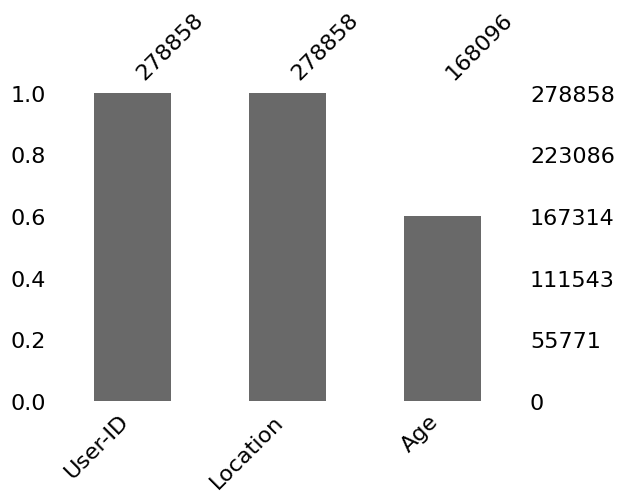

In [ ]:
# Visualizing the missing values
msno.bar(users_df, figsize = (6,4))

In [ ]:
# Rechecking the missing values
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

### ***2. Understanding Your Variables***

In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Dataset Columns
users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
# Dataset Describe
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Variables Description 

**User-ID** - Unique identification number of each user

**Location** - Information of the location of user

**Age** - Age of the said user

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
users_df.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [ ]:
# Checking the unique values in the Age column
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

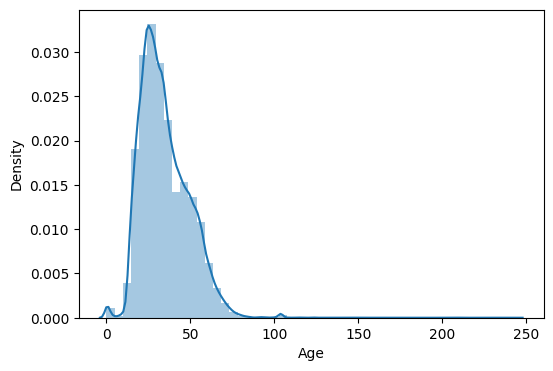

In [ ]:
# Plotting the distribution of the age column
plt.figure(figsize=(6,4)) 
sns.distplot(users_df['Age']); 

As it is rightly skewed we will fill it with median.

In [ ]:
# Sorting the unique values of age columns
print(sorted(list(users_df['Age'].unique())))   

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

As we can see that there values which are 0 and also more than 100 which dont really make sense, so we will replace the values below 5 and above 100 with the median of age.

In [ ]:
# Convert less than 5 and more than 100 age values to NaN
convert= (users_df['Age'] > 100) | (users_df['Age'] < 5)
users_df.loc[convert, 'Age'] = np.nan

In [ ]:
# Replace NaN values with median of remaining valid values
median_age = users_df['Age'].median()
users_df['Age'].fillna(median_age, inplace=True)

In [ ]:
# Recprinting unique values for age columns
print(sorted(users_df['Age'].unique())) 

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [ ]:
# Rechecking the null values
users_df.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

### 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking unique values for Location
users_df['Location'].unique() 

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
# Checking number of unique values for location 
users_df.Location.nunique() 

57339

There are way too many location to work with so we will extract the countries from them and work with only country.

In [ ]:
import re

def extract_country(location):
    match = re.search(r',\s?(\w+\s?\w*)\"*$', location)
    return match.group(1) if match else None

users_df['Country'] = users_df['Location'].apply(extract_country)
users_df.drop('Location', axis=1, inplace=True)

In [ ]:
# Checking unique numbers for country
users_df.Country.nunique()  

528

In [ ]:
# Rechecking missing values of users dataframe
users_df.isna().sum()

User-ID       0
Age           0
Country    4956
dtype: int64

In [ ]:
#Replacing some Misspelt Countries 
users_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria',
                             'autralia','cananda','geermany','germay','italia','united kindgonm','united sates','united staes',
                             'united state','united states','us','urugua','indiai','canada eh','le canada','nan'],
                           ['others','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia',
                            'canada','germany','germany','italy','united kingdom','usa','usa','usa','usa','usa',
                            'uruguay','india','canada','canada','others'],inplace=True)  

In [ ]:
# Filling the NaN values with other
users_df['Country'].fillna('other',inplace=True) 

In [ ]:
# Rechecking missing values
users_df.isnull().sum()

User-ID    0
Age        0
Country    0
dtype: int64

## Dataset Information Ratings


In [ ]:
# Shape of Ratings Data
Rows,Columns = ratings_df.shape
print("Number of Rows = ", Rows)
print("Number of Columns = ", Columns)

Number of Rows =  1149780
Number of Columns =  3


In [ ]:
# Dataset Info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
ratings_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

<Axes: >

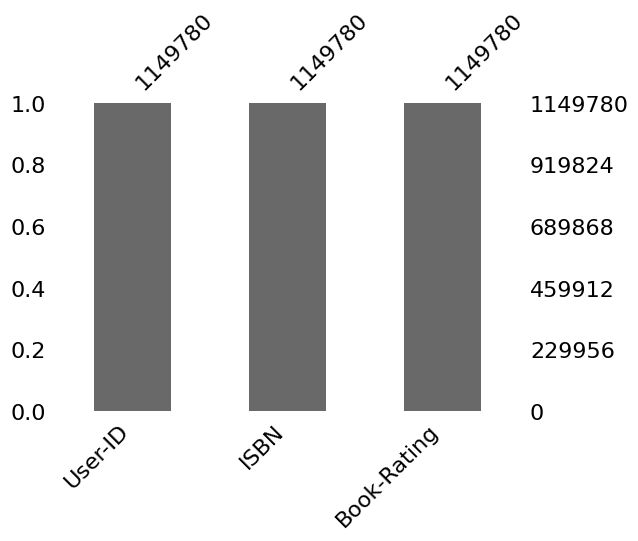

In [ ]:
# Visualizing the missing values
msno.bar(ratings_df, figsize = (6,4))

### ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
# Dataset Describe
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description 

**User-ID**- Unique Identification number of each user

**ISBN** - The International Standard Book Number is a numeric commercial book identifier that is intended to be unique. Publishers purchase or receive ISBNs from an affiliate of the International ISBN Agency. An ISBN is assigned to each separate edition and variation of a publication

**Book-Rating**- Rating that was given to a particular ISBN by the said user


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
ratings_df.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

### 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# checking the data
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


As the ratings are for the books present in books dataset. so both the datasets should match in ISBN column and similar is the case with users.

In [ ]:
# Filter ratings to only include ISBN present in books_df
ratings_df = ratings_df[ratings_df['ISBN'].isin(books_df['ISBN'])]

# Filter ratings to only include users present in users_df
ratings_df = ratings_df[ratings_df['User-ID'].isin(users_df['User-ID'])]

In [ ]:
# Getting the info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1031136 non-null  int64 
 1   ISBN         1031136 non-null  object
 2   Book-Rating  1031136 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.5+ MB


In [ ]:
# Checking the shape after data wrangling
ratings_df.shape 

(1031136, 3)

Now we have to drop other values

In [ ]:
# dividing the data in two parts where rating is equal to zero and not equal to zero
ratings_df_nonzero = ratings_df[ratings_df['Book-Rating'] != 0]  
ratings_df_zero = ratings_df[ratings_df['Book-Rating'] == 0]

In [ ]:
# After segregating Dataset Shape 
print('non zero rating dataset shape',ratings_df_nonzero.shape)
print('zero rating dataset',ratings_df_zero.shape) 

non zero rating dataset shape (383842, 3)
zero rating dataset (647294, 3)


In [ ]:
# Computing average rating for each book (ISBN)
book_ratings = ratings_df_nonzero.groupby('ISBN')['Book-Rating'].mean()
# Creating a new column 'Avg_Rating' and set its values to the corresponding average rating for each book
ratings_df_nonzero['Avg_Rating'] = ratings_df_nonzero['ISBN'].map(book_ratings) 

In [ ]:
# Checking the data
ratings_df_nonzero.head()   

,User-ID,ISBN,Book-Rating,Avg_Rating
1,276726,0155061224,5,5.000000
3,276729,052165615X,3,3.000000
4,276729,0521795028,6,6.000000
8,276744,038550120X,7,7.580247
16,276747,0060517794,9,8.000000


Merging the above three datasets to create a final dataset

In [ ]:
# Creating final dataframe  
Final_df = users_df.copy()                                     
Final_df = pd.merge(Final_df,ratings_df_nonzero,on='User-ID')    
Final_df = pd.merge(Final_df,books_df,on='ISBN')  

In [ ]:
# Checking the shape
Final_df.shape 

(383842, 10)

In [ ]:
# First five rows 
Final_df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,32.0,canada,0002005018,5,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,32.0,other,0002005018,8,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,32.0,other,0002005018,9,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,32.0,canada,0002005018,9,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [ ]:
# Checking information of merged dataframe
Final_df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              383842 non-null  int64  
 1   Age                  383842 non-null  float64
 2   Country              383842 non-null  object 
 3   ISBN                 383842 non-null  object 
 4   Book-Rating          383842 non-null  int64  
 5   Avg_Rating           383842 non-null  float64
 6   Book-Title           383842 non-null  object 
 7   Book-Author          383842 non-null  object 
 8   Year-Of-Publication  383842 non-null  float64
 9   Publisher            383842 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 32.2+ MB


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Creating a copy of the dataset
copy_df = Final_df.copy()

In [ ]:
copy_df.columns

Index(['User-ID', 'Age', 'Country', 'ISBN', 'Book-Rating', 'Avg_Rating',
       'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'],
      dtype='object')

#### Chart - 1 Checking number of users from different countries

Text(0.5, 1.0, 'Count of users Country wise')

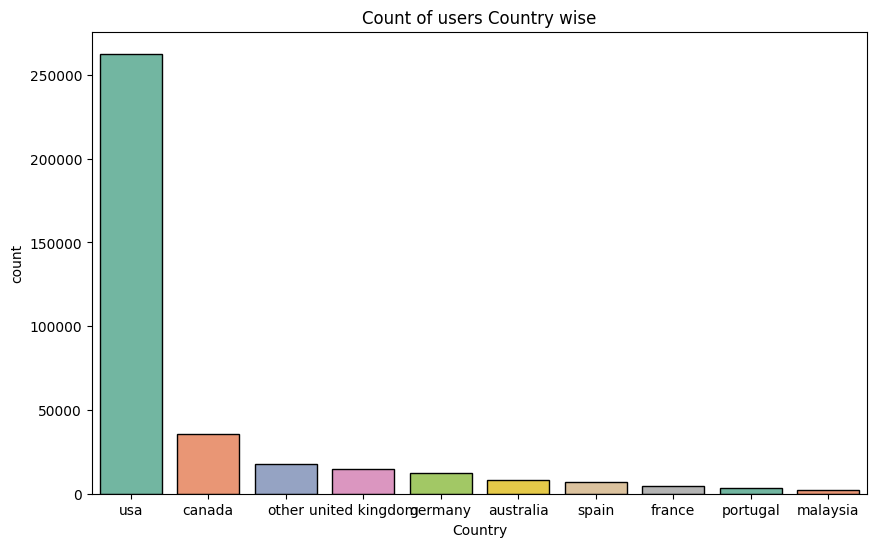

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x='Country',data=copy_df,order=pd.value_counts(copy_df['Country']).iloc[:10].index,edgecolor = 'black',palette = 'Set2')
plt.title('Count of users Country wise')

##### 1. Why did you pick the specific chart?

Count plot is best to plot value counts of a variable.

##### 2. What is/are the insight(s) found from the chart?

We can see that majority of the users are from USA.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help the company to decide which countries they have to focus on.

#### Chart - 2 Getting the names of top 20 publishers

Text(0.5, 1.0, 'Top 20 Publishers')

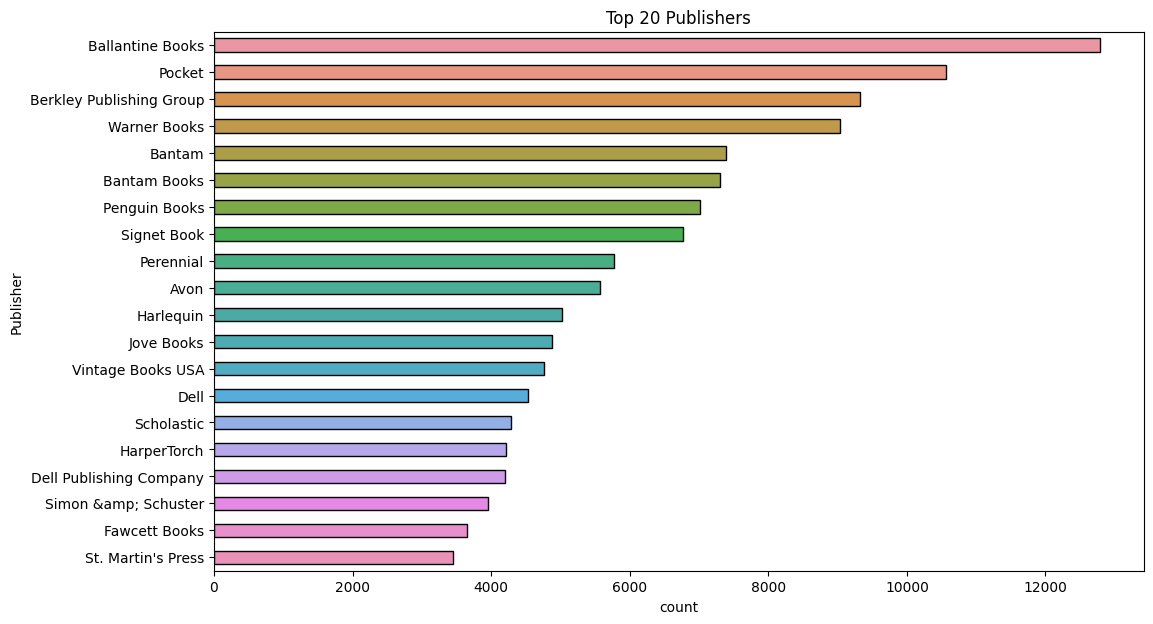

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12,7))
sns.countplot(y='Publisher',data=copy_df,order=pd.value_counts(copy_df['Publisher']).iloc[:20].index,width = 0.5,edgecolor = 'black')
plt.title('Top 20 Publishers')

##### 1. Why did you pick the specific chart?

This is a count plot which is used to show the value counts of each variable.

##### 2. What is/are the insight(s) found from the chart?

From the graph we can see that ballantine books is the top publisher.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It shows which of the publishers is most popular and the ones which are not.

#### Chart - 3 Top 20 Authors who reached most users

Text(0.5, 1.0, 'Top 20 Authors')

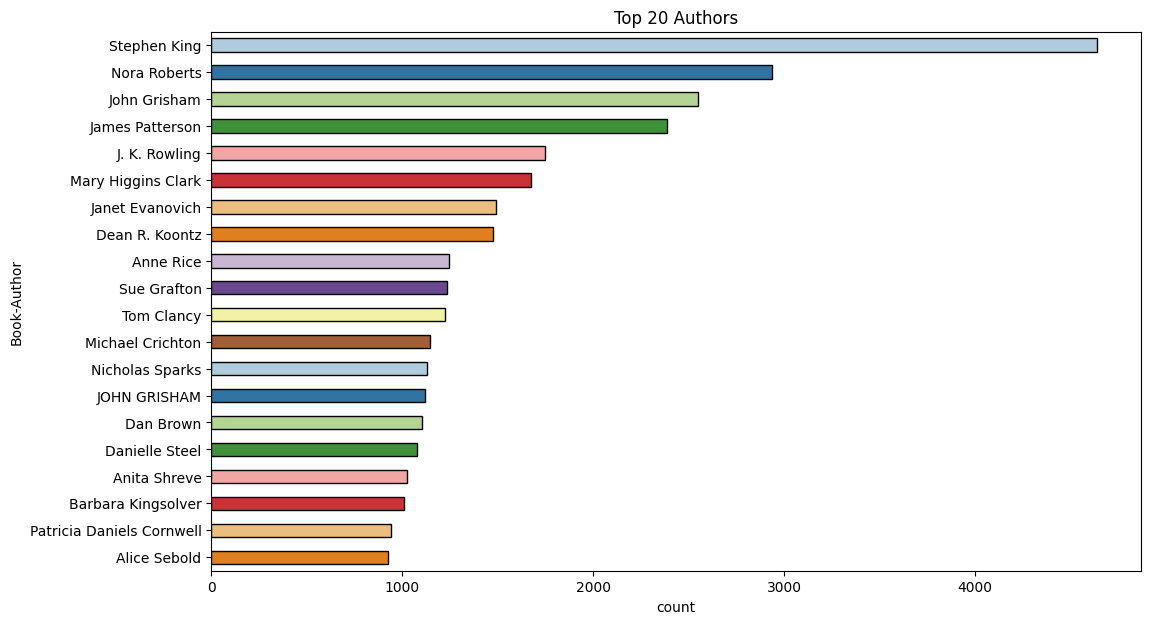

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12,7))
sns.countplot(y='Book-Author',data=copy_df,order=pd.value_counts(copy_df['Book-Author']).iloc[:20].index,width = 0.5,edgecolor = 'black', palette = 'Paired')
plt.title('Top 20 Authors')

##### 1. Why did you pick the specific chart?

We again used count plot as it gives top 10 author and there number of books count in one graph.

##### 2. What is/are the insight(s) found from the chart?

We can see that Stephen King is the top author.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help understand which author is most famous and which are the ones whose books are not being sold that much.

#### Chart - 4 Top 20 Books that reached most users

Text(0.5, 1.0, 'Top 20 Books')

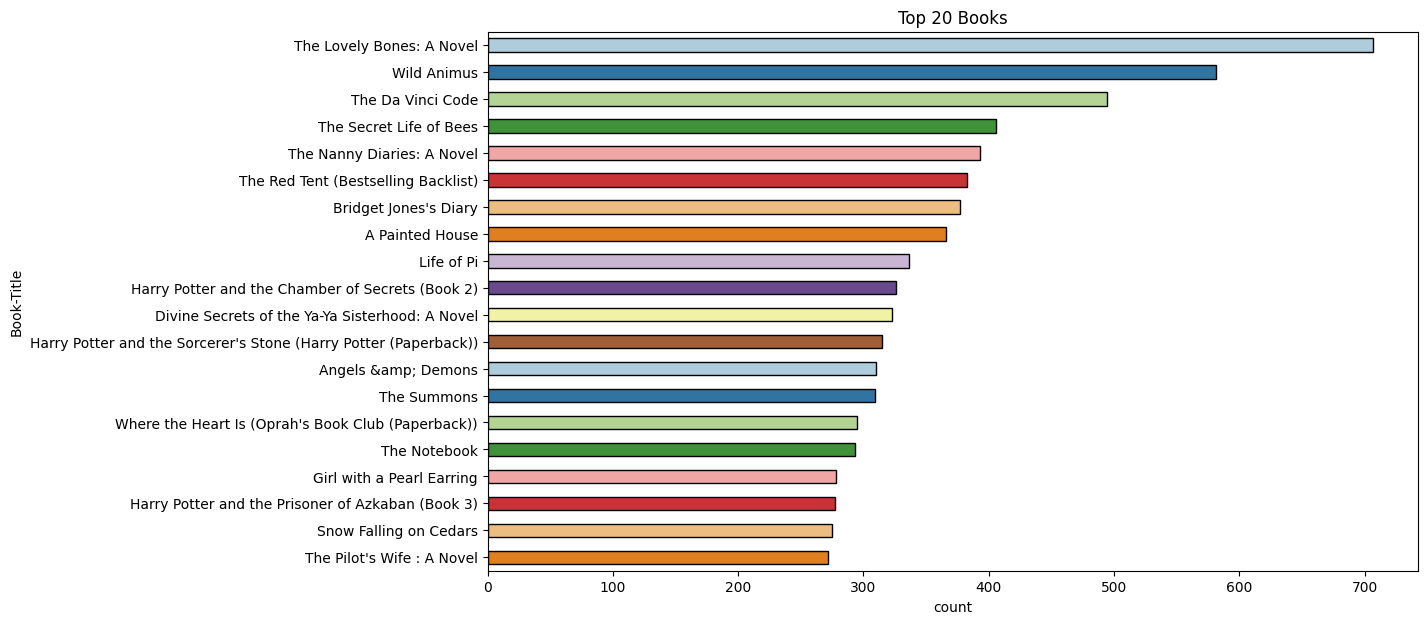

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(12,7))
sns.countplot(y='Book-Title',data=copy_df,order=pd.value_counts(copy_df['Book-Title']).iloc[:20].index,width = 0.5,edgecolor = 'black', palette = 'Paired')
plt.title('Top 20 Books')

##### 1. Why did you pick the specific chart?

Count plot is shows the values and there counts in a easily understandable way.

##### 2. What is/are the insight(s) found from the chart?

The lovely bones : a novel is the most sold novel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps decide to focus on the books which are getting sold easily and others which are not.

#### Chart - 5 Years with most number of books published

Text(0.5, 1.0, 'Year with most books published')

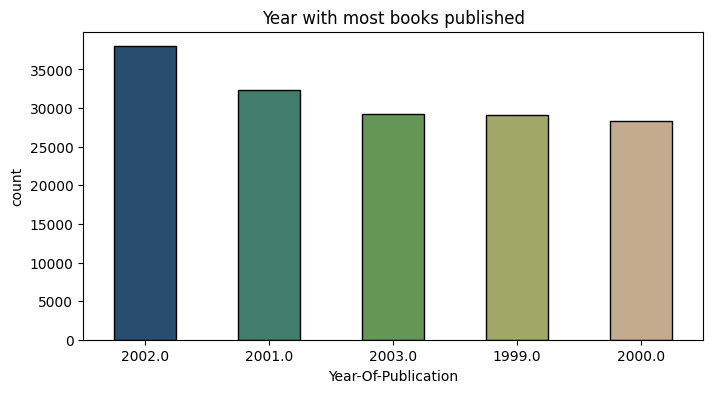

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8,4))
sns.countplot(x='Year-Of-Publication',data=copy_df,order=pd.value_counts(copy_df['Year-Of-Publication']).iloc[:5].index,width = 0.5,edgecolor = 'black', palette = 'gist_earth')
plt.title('Year with most books published')

##### 1. Why did you pick the specific chart?

Count plot is the best plot to use when plotting the count of values.

##### 2. What is/are the insight(s) found from the chart?

Most of the books were published in the year 2002.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help to find the year of publication of the books which are most sold

#### Chart - 6 Checking the age distribution of users

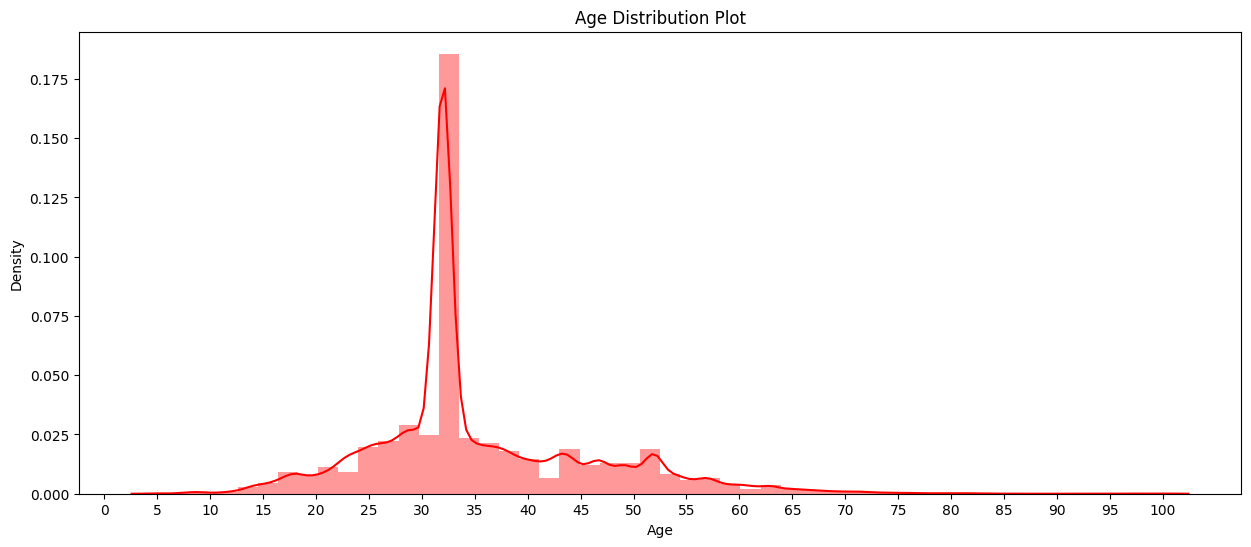

In [ ]:
# Chart - 6 visualization code
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(copy_df.Age,color = 'Red' )
plt.title('Age Distribution Plot')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.show()

##### 1. Why did you pick the specific chart?

Distribution plot shows the distribution of values in a specified range

##### 2. What is/are the insight(s) found from the chart?

we can see that most of the users are of age between 30-35.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help the company focus on a age group which would be most relevant for there publication.

#### Chart - 7 Rating number which is most used

Text(0.5, 1.0, 'Most used Rating')

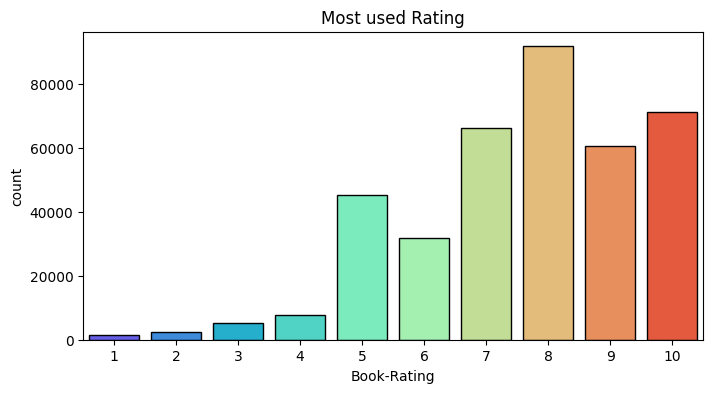

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(8,4))
sns.countplot(data=copy_df, x='Book-Rating', palette='rainbow',edgecolor = 'black')
plt.title('Most used Rating')

##### 1. Why did you pick the specific chart?

Countplot shows the values with their counts.

##### 2. What is/are the insight(s) found from the chart?

Most used rating is 8

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This shows where the ratings are low and where ratings are high.

#### Chart - 8 Top 10 Books by total ratings

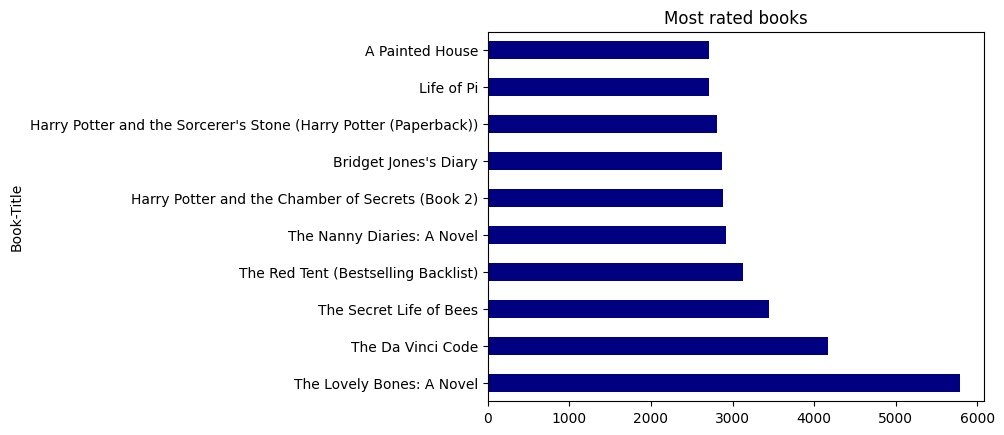

In [ ]:
# Grouping the title and rating column
book_rating = copy_df.groupby(['Book-Title'])['Book-Rating'].sum()

# Plotting using bar plot 
book_rating.sort_values(ascending = False).head(10).plot(kind = 'barh',color = 'navy')
plt.title('Most rated books')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot is best used in bivariate analysis

##### 2. What is/are the insight(s) found from the chart?

We can see that The Lovely Bones: A Novel is the most rated book

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight shows the books and their rating which would help understand the popularity of the book and content.

#### Chart - 9 Top 10 Author by total user ratings

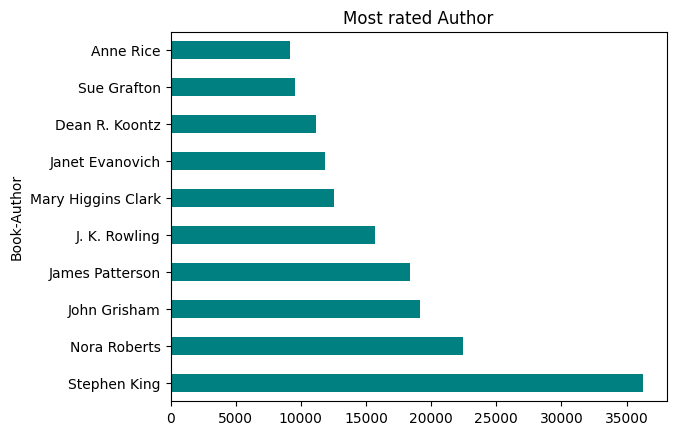

In [ ]:
# Chart - 9 visualization code
# Grouping the title and rating column
author_rating = copy_df.groupby(['Book-Author'])['Book-Rating'].sum()

# Plotting using bar plot 
author_rating.sort_values(ascending = False).head(10).plot(kind = 'barh',color = 'teal')
plt.title('Most rated Author')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot is best used in bivariate analysis

##### 2. What is/are the insight(s) found from the chart?

We can see that stephen king has received most of the ratings by users.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This would help find most popular author.

#### Chart - 10 Plotting the ratings origin country as compared to usa

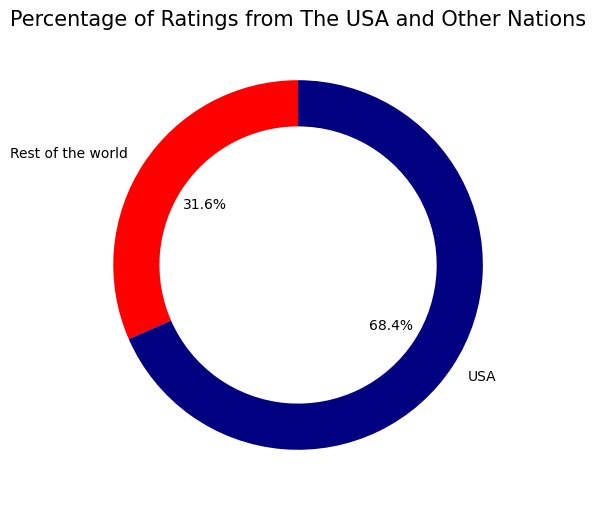

In [ ]:
#Plotting the ratings origination country
labels=['Rest of the world', 'USA']
colors = ['red','navy']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([len(copy_df[copy_df['Country']!='usa']), len(copy_df[copy_df['Country']=='usa'])], labels=labels, autopct='%1.1f%%',
       wedgeprops={'width':0.25}, startangle=90,colors = colors)
ax.set_title('Percentage of Ratings from The USA and Other Nations', fontsize=15)
plt.show()
     

##### 1. Why did you pick the specific chart?

Pie plot is best to differentiate between two variables

##### 2. What is/are the insight(s) found from the chart?

We can see that most of the ratings originated in USA while rest of the world only had 31.6% of the ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that most of the users are from USA

#### Chart - 11 Top 10 books by their Average rating

In [ ]:
# Sorting the values in Average rating column and then only taking the top 10 values
top10 = copy_df.sort_values('Avg_Rating', ascending=False).head(10)

Text(0.5, 1.0, 'Most rated books')

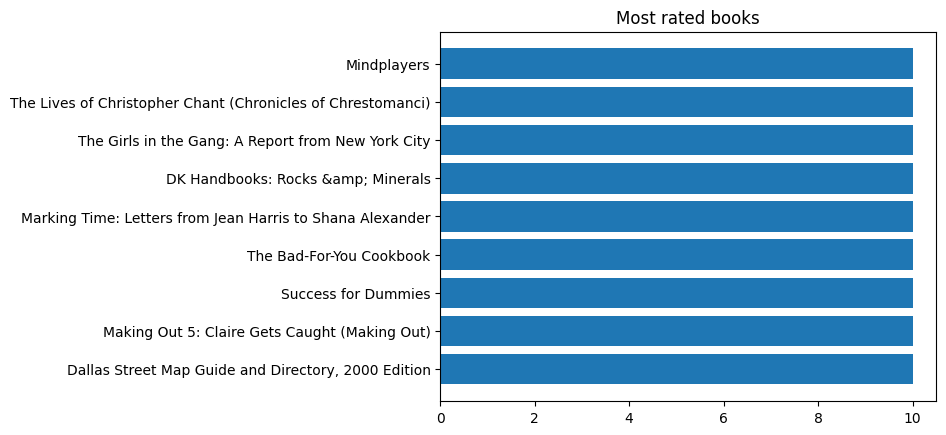

In [ ]:
# Plotting using horizontal bargraph
plt.barh(top10['Book-Title'], top10['Avg_Rating'])
plt.title('Most rated books')

##### 1. Why did you pick the specific chart?

Horizontal bar graph shows the variables and their values in one graph and it is mostly used for bivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that there are many books which have Average rating of 10.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This will help to know the best rated books.

#### Chart - 12 Boxplot of Book Ratings

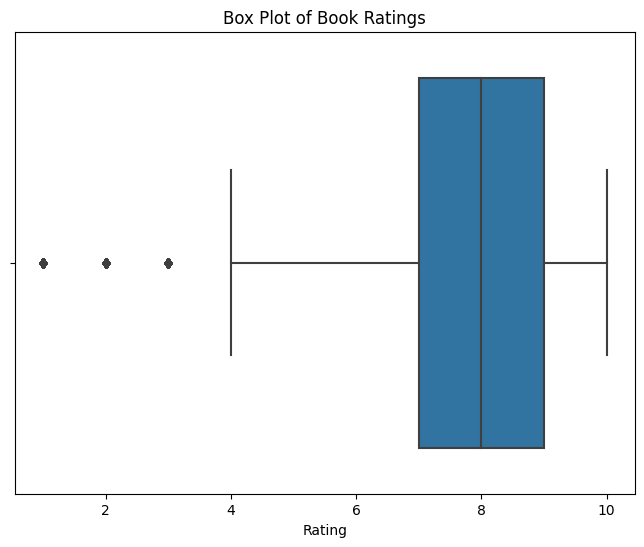

In [ ]:
# Visualization code
plt.figure(figsize=(8, 6))
sns.boxplot(data=copy_df, x='Book-Rating')
plt.title('Box Plot of Book Ratings')
plt.xlabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot displays the five number summary of a dataset.

##### 2. What is/are the insight(s) found from the chart?

The maximum values ranges around 8.

#### Chart - 13 Scatter plot of age and book rating comparison

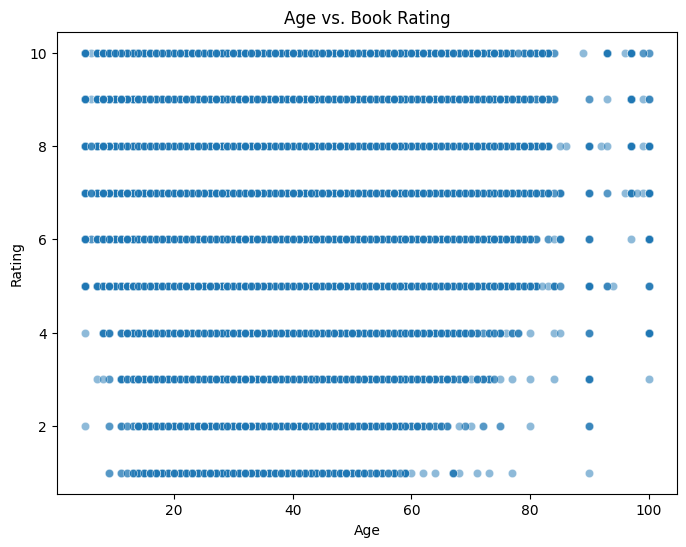

In [ ]:
# Scatter plot of age vs. book rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=copy_df, x='Age', y='Book-Rating', alpha=0.5)
plt.title('Age vs. Book Rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see the scatter of rating in the range of ages.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help the company understand the which age customers are usually giving what rating.

#### Chart - 14 Heatmap

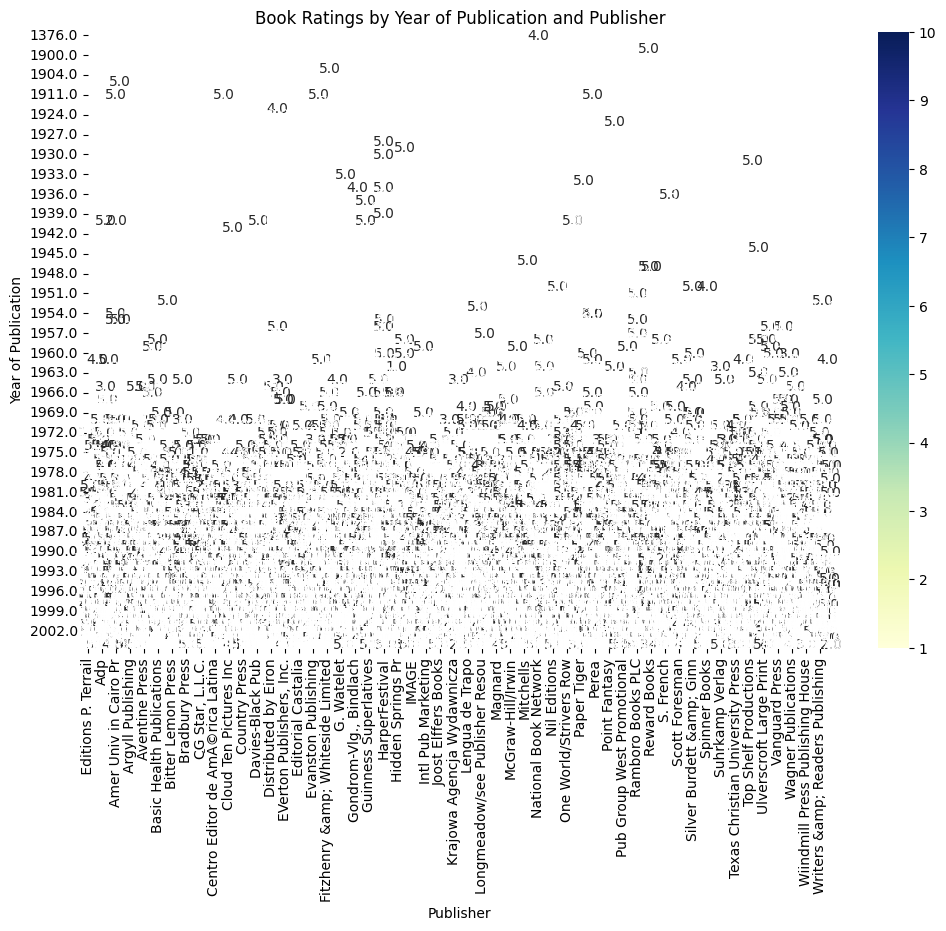

In [ ]:
# Chart - 12 visualization code
# Creating a group
grouped = copy_df.groupby(['Year-Of-Publication', 'Publisher'])['Book-Rating'].mean().reset_index()

# reshaping the DataFrame to have year of publication as rows, publisher as columns, and mean rating as values
pivot_table = grouped.pivot(index='Year-Of-Publication', columns='Publisher', values='Book-Rating')

# creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='.1f', cbar=True)
plt.title('Book Ratings by Year of Publication and Publisher')
plt.xlabel('Publisher')
plt.ylabel('Year of Publication')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap shows the correlation between the variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

There is not much correlation that can be inferred from the heatmap.

#### Chart - 15 - Pair Plot 

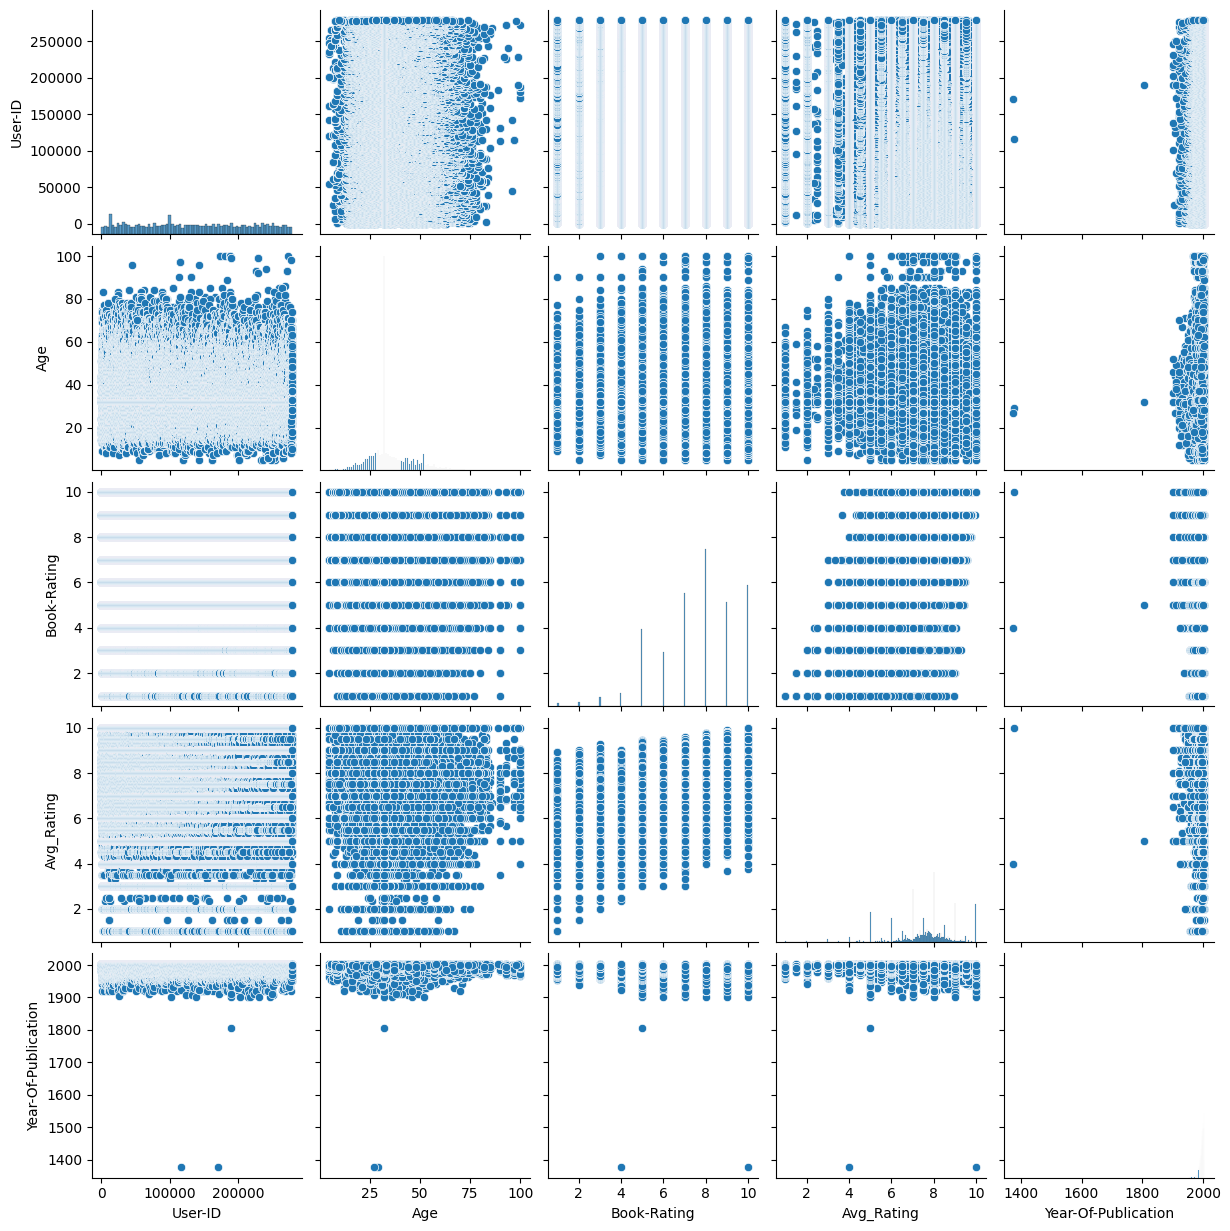

In [ ]:
# Pair Plot visualization code
columns = ['User-ID', 'Age', 'Book-Rating', 'Avg_Rating', 'Year-Of-Publication']
sns.pairplot(copy_df[columns])

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
copy_df.isna().sum()

User-ID                0
Age                    0
Country                0
ISBN                   0
Book-Rating            0
Avg_Rating             0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
copy_df.isnull().sum()

User-ID                0
Age                    0
Country                0
ISBN                   0
Book-Rating            0
Avg_Rating             0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing or null values in the dastaset.

### As we have already performed all the data wrangling and pre-processing operations we now move towards model implementation

## ***7. ML Model Implementation***

### ML Model - 1 Content Based Filtering

In [ ]:
# Creating a copy of the dataset for model implementation
content_df = copy_df.copy()

Creating a function for content based recommendation system

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# define the function
def content_based_recommender_table(book_title, number=5):
    # Convert the input book title to a string type
    book_title = str(book_title)
    
    # Check if the input book title is in the dataset  
    if book_title in content_df['Book-Title'].values: 
        # Count the number of times each book title appears in the dataset  
        rating_counts = pd.DataFrame(content_df['Book-Title'].value_counts()) 
        # Get the book titles that appear less than or equal to 100 times  
        rare_books = rating_counts[rating_counts['Book-Title'] <= 100].index 
        # Get the subset of the dataset that only contains book titles that appear more than 100 times         
        common_books = content_df[~content_df['Book-Title'].isin(rare_books)]  
        
        # If the input book title appears less than or equal to 100 times in the dataset
        if book_title in rare_books:    
            # Randomly select two book titles from the common_books dataset
            random = pd.Series(common_books['Book-Title'].unique()).sample(2).values    
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        # If the input book title appears more than 100 times in the dataset
        else:      
            # Drop any duplicates of book titles in the common_books dataset
            common_books = common_books.drop_duplicates(subset=['Book-Title']) 
            # Reset the index of the common_books dataset  
            common_books.reset_index(inplace= True) 
            # Create a new index column with consecutive integers                             
            common_books['index'] = [i for i in range(common_books.shape[0])]    
            
            # Get the columns to be used for computing cosine similarity
            target_cols = ['Book-Title','Book-Author','Publisher']
            # Combine the target columns into a single string for each book title               
            common_books['combined_features'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in range(common_books[target_cols].shape[0])]  

            # Initialize the CountVectorizer object    
            cv = CountVectorizer() 
            # Create a count matrix of the combined features using CountVectorizer        
            count_matrix = cv.fit_transform(common_books['combined_features']) 
            # Compute the cosine similarity matrix   
            cosine_sim = cosine_similarity(count_matrix)
            # Get the index of the input book title in the common_books dataset                          
            index = common_books[common_books['Book-Title'] == book_title]['index'].values[0] 
            # Get the cosine similarity scores of the input book title with all other book titles  
            sim_books = list(enumerate(cosine_sim[index])) 
            # Sort the cosine similarity scores in descending order and select the top 5 books with the highest scores, excluding the input book title itself        
            sorted_sim_books = sorted(sim_books,key=lambda x:x[1],reverse=True)[1:number+1]  
                                    
            # Create a empty list for books
            books = []
            for i in range(len(sorted_sim_books)):
                # Get the book titles that have the indices that correspond to the top 5 cosine similarity scores
                book_title = common_books.iloc[sorted_sim_books[i][0]]['Book-Title'] 
                # Get the book authors that have the indices that correspond to the top 5 cosine similarity scores
                book_author = common_books.iloc[sorted_sim_books[i][0]]['Book-Author']
                # Get the book publisher that have the indices that correspond to the top 5 cosine similarity scores
                book_publisher = common_books.iloc[sorted_sim_books[i][0]]['Publisher']
                # Append the book title, author, and publisher to the books list
                books.append([book_title, book_author, book_publisher])
            
            # Convert the books list to a pandas dataframe and add column names
            books_df = pd.DataFrame(books, columns=['Recommended Book Title', 'Recommended Book Author', 'Recommended Book Publisher'])
            # Print the recommended books
            print(books_df.to_string(index=False))
            
    else: 
        # If the input book title is not in the dataset, print an error message 
        print('Error: Book title not found in the dataset')
                

The content-based filtering recommendation system employs the CountVectorizer and cosine similarity algorithm to suggest books to users based on the resemblance of their author and publisher with the input book. CountVectorizer transforms the aggregated characteristics (author and publisher) of each book into a matrix of token counts. The cosine similarity algorithm is then applied to compute the similarity between the input book and all other books in the dataset using their token counts. The top 5 books with the highest similarity scores are recommended to the user.

Checking recommendations using the function

In [ ]:
# Using the function
content_based_recommender_table("Animal Farm")

Recommended Book Title Recommended Book Author Recommended Book Publisher
                  1984           George Orwell                Signet Book
              Insomnia            Stephen King                Signet Book
            Back Roads            Tawni O'Dell                Signet Book
     Dolores Claiborne            Stephen King                Signet Book
          Pet Sematary            Stephen King                Signet Book


### ML Model - 2 K-Nearest neighbour

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split 
#train test split 
Final_train_df, Final_test_df = train_test_split(content_df, 
                                   test_size=0.20,
                                   random_state=42)

print('# Train set: %d' % len(Final_train_df))
print('# Test set: %d' % len(Final_test_df))

# Train set: 307073
# Test set: 76769


In [ ]:
# Filter users with at least 3 ratings
# set the threshold for minimum number of ratings per user
user_ratings_threshold = 3  

# filter the ratings dataframe to keep only the ratings by users who meet the minimum threshold
df_ratings_top = Final_train_df.groupby('User-ID').filter(lambda x: len(x) >= user_ratings_threshold)  

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))
# Filter top most frequently rated books

# set the percentage of top-rated books to keep
book_ratings_threshold_perc = 0.1

# compute the threshold for minimum number of ratings for a book to be included
book_ratings_threshold = int(len(df_ratings_top['ISBN'].unique()) * book_ratings_threshold_perc)

# compute the number of ratings for each book and sort in descending order
book_ratings_counts = df_ratings_top.groupby('ISBN').count()['User-ID'].sort_values(ascending=False)

# select the top-rated books that meet the minimum threshold
filter_books_list = book_ratings_counts.iloc[:book_ratings_threshold].index.to_list() 

# filter the ratings dataframe to keep only the ratings for the selected books
df_ratings_top = df_ratings_top[df_ratings_top['ISBN'].isin(filter_books_list)]  

# print the filter parameters and the number of remaining records after filtering
print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))  


Filter: users with at least 3 ratings
Number of records: 256710
Filter: top 10% most frequently rated books
Number of records: 120449


In [ ]:
# Creating the instance for model implementation
#droping the duplicates
df_ratings_top = df_ratings_top.drop_duplicates(['User-ID', 'Book-Title'])  
 #making pivot table
ratings_matrix_new = df_ratings_top.pivot(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)

# implementing KNN algorithm 
from sklearn.neighbors import NearestNeighbors  
model_knn = NearestNeighbors(metric ='cosine', algorithm ='brute')
model_knn.fit(ratings_matrix_new)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Taking user input for book title
book_title = input("Enter a book title: ")

# Finding the index of the book in ratings_matrix_new
if book_title in ratings_matrix_new.index:
    query_index = ratings_matrix_new.index.get_loc(book_title)
    print('Book title:', book_title)

    # Generating recommendations
    distances, indices = model_knn.kneighbors(ratings_matrix_new.iloc[query_index,:].values.reshape(1, -1), n_neighbors=10)

    # Printing recommendations
    print('Recommended books similar to "{}":\n'.format(book_title))
    for i in range(1, len(distances.flatten())):# Iterate over each neighbor except the first one, which will always be the book itself
        print('{}. {}, with similarity score of {:.2f}'.format(i, ratings_matrix_new.index[indices.flatten()[i]], 1-distances.flatten()[i]))
else:
    print("Book title not found in dataset.")

Enter a book title: Animal Farm
Book title: Animal Farm
Recommended books similar to "Animal Farm":

1. Silver Scream : A Bed-and-Breakfast Mystery (Bed-And-Breakfast Mysteries (Paperback)), with similarity score of 0.17
2. LIFE AFTER GOD : LIFE AFTER GOD, with similarity score of 0.15
3. Don't Sweat the Small Stuff in Love : Simple Ways to Nurture, and Strengthen Your Relationships While Avoiding the Habits That Break Down Your Loving  ... tion (Don't Sweat the Small Stuff (Hyperion)), with similarity score of 0.15
4. Read This and Tell Me What It Says : Stories (Bard Book), with similarity score of 0.15
5. What's Bred in the Bone, with similarity score of 0.15
6. The Divine Comedy: Inferno (Penguin Classics), with similarity score of 0.14
7. Party Monster : A Fabulous But True Tale of Murder in Clubland, with similarity score of 0.14
8. RICHARD III, with similarity score of 0.14
9. A Christmas Carol (Dover Thrift Editions), with similarity score of 0.14


The Collaborative Filtering recommendation system is designed to provide book recommendations to users using the K-nearest neighbors (KNN) algorithm. To enhance the quality of recommendations, two filters are applied to the ratings dataset to keep only the ratings by users who have rated a certain number of books, and to keep only the top-rated books that meet a certain threshold. Once the filtering is done, a pivot table is created with books as rows, users as columns, and ratings as cell values.

To generate recommendations, the system takes input from the user for a specific book title and finds the index of the book in the pivot table. It then employs the KNN algorithm to locate the k-nearest neighbors of the input book based on their ratings history. Finally, it prints the top recommendations in order of similarity.

# **Conclusion**

Following are the steps involved in this project:-

1. We started with first importing the library and loading the three datasets that were essential for this project.
2. After loading the data we took a first view of the datasets and then decided to go through them one by one.
3. Starting with Books dataset we checked its info and first five rows and found that there seems to be some unnecessary columns present in the data.
4. After dropping the URL column we checked for missing values and handled them appropriately.
5. Next step was to check the columns and variables description.
6. Now we performed data wrangling on the data to make it analysis ready.
7. in the data wrangling we corrected a few rows where values occured erroneously.
8. Changed the data type of Year of publication to integer.
9. Next we moved towards the Users dataset here again we performed the similar steps which we did on the books dataset.
10. In the data wrangling part of Users dataset we corrected some age values and also we extracted countries names and replaced the values in the location column with only country name for the ease of work.
11. Moving on to the Ratings dataset we again did same things as compared to the other two datasets.
12. In the data wrangling part we segregated the data in non-zero and zero ratings and decided to work only with the non-zero ratings data.
13. After that we merged all the three dataset using ISBN column as it was present in all three of the datasets to move to next steps.
14. And then it was time for data visualization in which we tried to find out some crucial insights with the help of plots not limited to count,pie, scatter, box etc.
15. After the visualization part we move towards model implementation.
16. Here we started with Content Based Filtering model for which we created a function which will take the book title as input and then recommed 5 books similar to the input and if it can not find similar books it would say that no recommendations found for the book.
17. in this model we used countvectorizer and cosine similarity model.
18. Next model we used was K-nearest neighbour here it will use collaborative method to recommend books that are similar to the input.
19. After checking that both the model are working well we reached to the end of the project.




                                                                 THANK YOU






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***